<a href="https://colab.research.google.com/github/gokturkberke/AI-Bootcamp/blob/main/01_neural_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

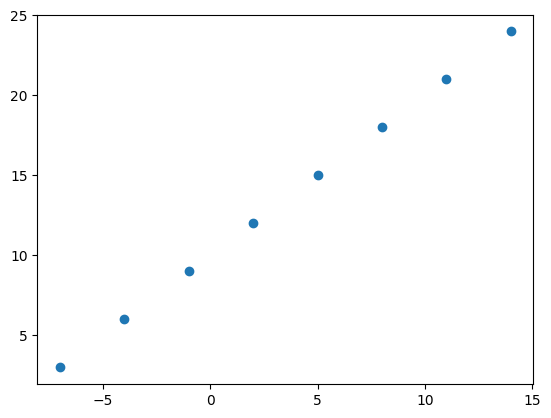

In [2]:
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])
#Create labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

#Visualize it
plt.scatter(X,y);

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

##Input and Output Shapes

In [4]:
#Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0],y[0]

(np.float64(-7.0), np.float64(3.0))

In [6]:
X[1],y[1]

(np.float64(-4.0), np.float64(6.0))

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [8]:
X[0].ndim

0

In [9]:
#Turn our Numpy Arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [10]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

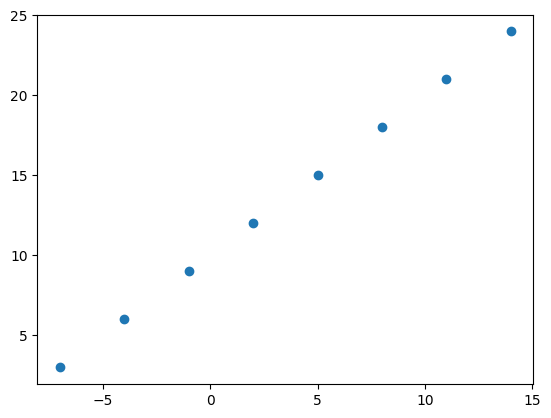

In [11]:
plt.scatter(X,y)

#Steps in modelling TensorFlow

1. Creating a model - define the input and output layers as well as the hidden layers of a deep learning model
2. Compiling a model define the loss function and the optimizer and evaluation metrics
3. Fitting a model - letting the model try to find patterns between X & y


1.   Loss = How wrong your models predictions compared to the truth label
2.   Optimizer = How your model should update its internal paterns to better its predictions
3.   Metrics = Human interpretable values for how well your model is doing




In [12]:
tf.random.set_seed(42)
# Create the model using Sequential API
model = tf.keras.Sequential([ #sequential katmanlari sirayla(ardisik) eklemek icin kullanilan model tipi
    tf.keras.layers.Dense(1) #icinde 1 adet nöron var yani bu model giristeki veriyi alip tek bir cikti degeri uretir
])

#2. Compile the modle
model.compile(loss = tf.keras.losses.mae, # hata fonksiyonu mae
              optimizer = tf.keras.optimizers.SGD(),# sgd is short for stochastics gradient descent = agirliklari adim adim guncelleyerek kaybi azaltmaya calisir (ogrenme algoritmasi sgd)
              metrics=["mae"]) #egitim sirasinda takip etmek istedigimiz metrik
#3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=5) #epochs = 5 tüm veri setini 5 kez bastan sona modelin gormesini sagliyoruz
#Burada axis=-1, sonuna yeni bir boyut ekliyor.

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 17.6589 - mae: 17.6589
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - loss: 17.3777 - mae: 17.3777
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - loss: 17.0964 - mae: 17.0964
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - loss: 16.8152 - mae: 16.8152
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - loss: 16.5339 - mae: 16.5339


X = [1, 2, 3, 4]
X.shape → (4,)

tf.expand_dims(X, axis=-1).shape → (4, 1)
bu yuzden fitte tf.expand_dims kullaniyoruz

In [13]:
# Try and make prediction using our model
y_pred = model.predict(tf.expand_dims([17.0], axis=-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


In [14]:
#Improving our model (options are adding more layers(number of tf.keras.layers.dense) change the activation function , increase the number of hidden units,change the optimization function,change the learning rate, fitting on more data , fitting for longer(epochs))

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step - loss: 10.4373 - mae: 10.4373
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 10.3048 - mae: 10.3048
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 10.1723 - mae: 10.1723
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 10.0398 - mae: 10.0398
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 9.9073 - mae: 9.9073
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 9.7748 - mae: 9.7748
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 9.6423 - mae: 9.6423
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 9.5098 - mae: 9.5098
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 9.3773 - mae: 9.3773
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 9.2448 - mae: 9.2448
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 9.1123 - mae: 9.1123
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 8.9798 - mae: 8.9798
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

In [15]:
model.predict(tf.expand_dims([17.0],axis=-1)) #much more better

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


array([[29.965998]], dtype=float32)

In [16]:
#This time with an extra hidden layer
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation = "relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss= "mae",
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step - loss: 12.1736 - mae: 12.1736
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 11.5923 - mae: 11.5923
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 11.0031 - mae: 11.0031
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 10.3978 - mae: 10.3978
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 9.7722 - mae: 9.7722
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 9.1136 - mae: 9.1136
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 8.4381 - mae: 8.4381
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 7.7234 - mae: 7.7234
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 6.9678 - mae: 6.9678
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 6.2011 - mae: 6.2011
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 5.3814 - mae: 5.3814
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 4.4986 - mae: 4.4986
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

In [17]:
model.predict(tf.expand_dims([17.0],axis=-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


array([[32.596764]], dtype=float32)

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation = None),
    tf.keras.layers.Dense(1)
])

model.compile(loss= "mae",
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01), #changed to Adam also added learning rate
              metrics = ["mae"])

model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 14.8704 - mae: 14.8704
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 14.0772 - mae: 14.0772
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 13.2882 - mae: 13.2882
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 12.5029 - mae: 12.5029
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 11.7196 - mae: 11.7196
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 10.9356 - mae: 10.9356
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 10.1484 - mae: 10.1484
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 9.3556 - mae: 9.3556
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 8.5549 - mae: 8.5549
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 7.7442 - mae: 7.7442
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 6.9210 - mae: 6.9210
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 6.5741 - mae: 6.5741
Epoch 13/100
1/1 ━━━━━━━━━━━━━━

In [19]:
model.predict(tf.expand_dims([17.0],axis=-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


array([[26.607378]], dtype=float32)

## Evaluating a model

In [20]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [21]:
#Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

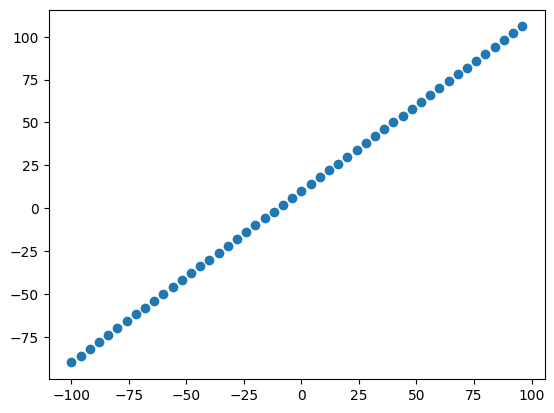

In [22]:
plt.scatter(X,y)

### The 3 sets

* **Training set** = the model learns from this data typically %70-80 of the total data
* **Validation set** - the model gets tuned on this data 10-15 % data
* **Test set** = the model gets evaluated typically 10-15 %

In [23]:
len(X)

50

In [24]:
#Split the data into train and test sets
X_train = X[:40] #first 40 training samples
y_train = y[:40]

X_test = X[40:] #last 10 testing samples
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

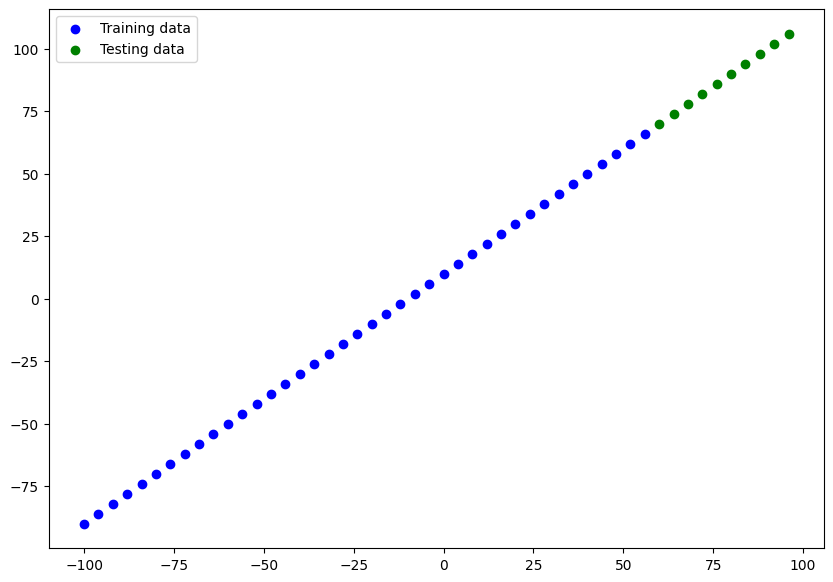

In [25]:
# Visualizing the data
plt.figure(figsize=(10,7)) #10 × 7 inç
#Plot training data in blue
plt.scatter(X_train,y_train,c="b",label="Training data")

#Plot test data in green
plt.scatter(X_test,y_test,c="g",label="Testing data")

#Show the legend
plt.legend();

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# model.fit(X_train,y_train,epochs=100)

In [27]:
print("X_train:", X_train.shape, X_train.dtype)
print("y_train:", y_train.shape, y_train.dtype)

X_train: (40,) <dtype: 'int32'>
y_train: (40,) <dtype: 'int32'>


In [28]:
X[0].shape,X[0],y[0]

(TensorShape([]),
 <tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [29]:

X_train = tf.reshape(X_train, [-1, 1])  # (40,) -> (40, 1)
y_train = tf.reshape(y_train, [-1, 1])  # (40,) -> (40, 1)

# Veri tiplerini float'a çevirin
X_train = tf.cast(X_train, tf.float32)
y_train = tf.cast(y_train, tf.float32)

print(f"X_train yeni shape: {X_train.shape}")
print(f"y_train yeni shape: {y_train.shape}")

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1],name="input_layer"),
    tf.keras.layers.Dense(1,name="output_layer")
],name="model_2")

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"]
)


X_train yeni shape: (40, 1)
y_train yeni shape: (40, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.summary()

Model: "model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

* Total Parms =  total number of paramteres in the model
* Trainable paramters =  these are the parameters the model can update as it trains
* NON-trainable params = this is typical when you bring in already learn patterns or paramteres from other models during transfer learning!!

# Dense Katmanları — Parametre Hesabı ve Kısa Örnekler

**Parametre sayısı (Dense katmanı için):**

```
params = units * (input_dim + 1)   # +1 bias için
```

---

## Örnek 1 — Çok katmanlı model

```python
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu", input_shape=[1]),
    tf.keras.layers.Dense(1)
])
```

* İlk katman param = `100 * (1 + 1) = 200`
* İkinci katman param = `1 * (100 + 1) = 101`  (çünkü ikinci katmanın girdi boyutu 100)
* Toplam param = `301`

**model.summary() (örnek çıktı)**

```
Layer (type)                 Output Shape              Param #
=================================================================
dense (Dense)                (None, 100)               200
dense_1 (Dense)              (None, 1)                 101
=================================================================
Total params: 301
Trainable params: 301
Non-trainable params: 0
```

---

## Örnek 2 — Tek katmanlı model

```python
model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, input_shape=[1])
])
```

* Parametre sayısı = `5 * (1 + 1) = 10`

**model.summary() (örnek çıktı)**

```
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #
=================================================================
dense (Dense)                (None, 5)                 10
=================================================================
Total params: 10
Trainable params: 10
Non-trainable params: 0
```

---

## Kısa notlar

* Aktivasyon fonksiyonları (`relu`, `sigmoid`, vb.) **parametre sayısını değiştirmez**; sadece katmanın çıktısını nasıl hesapladığını etkiler.
* Çok büyük `units` sayıları modelin kapasitesini artırır ama **overfitting** riskini ve hesaplama maliyetini yükseltir.
* Giriş verin tek boyutluysa modele verirken `(n,1)` şekline getirin: örn. `X.reshape(-1,1)` veya `tf.expand_dims(X, -1)`.

---

Kopyala-yapıştır yapabileceğin tek sayfa metin bu şekilde hazır. İstersen bu metni Colab'a yapıştırdığında çalıştırılabilir kod blokları halinde de düzenleyeyim.


In [31]:
model.fit(X_train,y_train,epochs=100,verbose= 0) #verbose eğitim sırasında ekrana ne kadar bilgi yazdırılacağını kontrol eden parametre.
# 0 = hic bilgi yazdirmaz  2 sade satir bilgisi yazdirir bi tane

In [32]:
model.summary()

Model: "model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95 (384.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 64 (260.00 B)

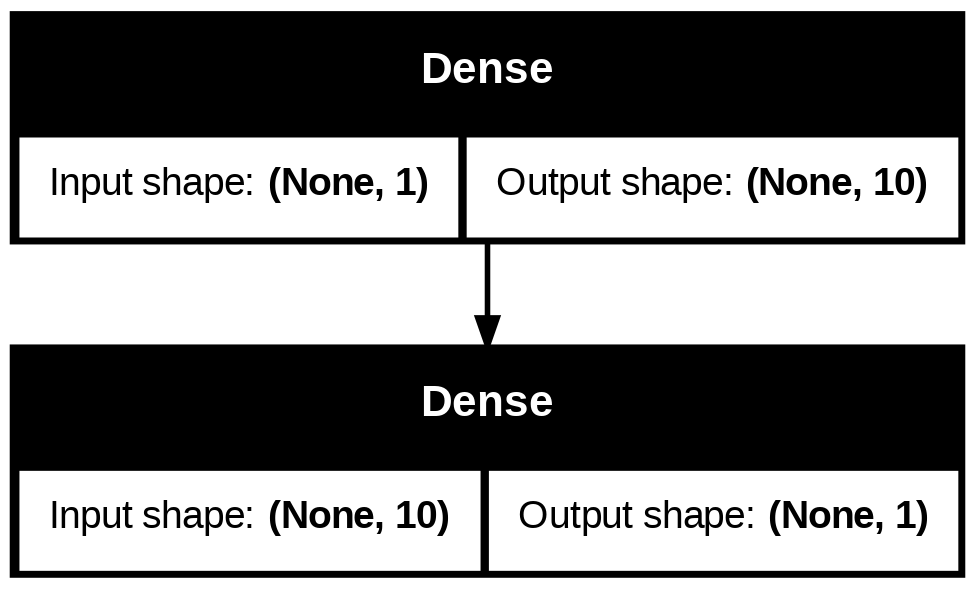

In [33]:
from tensorflow.keras.utils import plot_model

plot_model(model = model,show_shapes=True)

In [34]:
#Visualize the models predictions
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


array([[ 69.03417],
       [ 72.97987],
       [ 76.92558],
       [ 80.87129],
       [ 84.81701],
       [ 88.76272],
       [ 92.70842],
       [ 96.65414],
       [100.59984],
       [104.54556]], dtype=float32)

In [35]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [36]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data = X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10,7))
  #Plot training data in blue
  plt.scatter(train_data,train_labels,c="b",label="Training data")

  #Plot test data in green
  plt.scatter(test_data,test_labels,c="g",label="Testing data")

  #plot models predictions in red
  plt.scatter(test_data,predictions,c="r",label="Predictions")

  #Show the legend
  plt.legend();

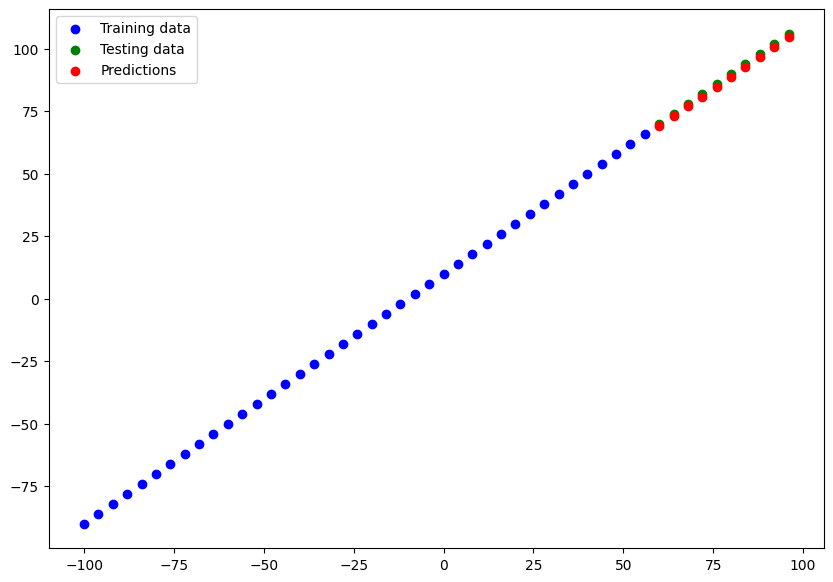

In [37]:
plot_predictions()

### Evaluating our models predictions with regression evaluation metrics

In [38]:
# two main metrics MAE - mean absolute error and MSE - mean square error HUBER = combination of MSE AND MAE
model.evaluate(X_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step - loss: 1.2101 - mae: 1.2101


[1.210139513015747, 1.210139513015747]

In [39]:
y_pred

array([[ 69.03417],
       [ 72.97987],
       [ 76.92558],
       [ 80.87129],
       [ 84.81701],
       [ 88.76272],
       [ 92.70842],
       [ 96.65414],
       [100.59984],
       [104.54556]], dtype=float32)

In [40]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [44]:
#Calculate the mean absolute error
